<a href="https://colab.research.google.com/github/gantaphani/Phanesh_INFO5502_Spring2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [26]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import math

In [27]:
#Reading/printing traning and test datasets
trainingSet=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/train_luc.csv',sep=',')
print(str("!!!TRAINING SET!!!").center(100))
print(trainingSet.head(5).to_string())
testSet=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv',sep=',')
print(str("!!!TESTING SET!!!").center(100))
print(testSet.head(5).to_string())

                                         !!!TRAINING SET!!!                                         
              datetime  season  holiday  workingday  weather  temp   atemp  humidity  windspeed  casual  registered  count
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395        81        0.0       3          13     16
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635        80        0.0       8          32     40
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635        80        0.0       5          27     32
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395        75        0.0       3          10     13
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395        75        0.0       0           1      1
                                         !!!TESTING SET!!!                                          
              datetime  season  holiday  workingday  weather

In [28]:
#Checking For Null Values in both the datasets
print(trainingSet.any().isna())
print('Note there are no null values in the Traning Dataset\n')
print(testSet.any().isna())
print('Note there are no null values in the Testing Dataset')

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool
Note there are no null values in the Traning Dataset

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool
Note there are no null values in the Testing Dataset


In [29]:
#Checking For Duplicate values in both the datasets
print(trainingSet[trainingSet.duplicated()])
print('Note there are no Duplicates in the Traning Dataset\n')
print(testSet[testSet.duplicated()])
print('Note there are no Duplicates in the Testing Dataset\n')

Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []
Note there are no Duplicates in the Traning Dataset

Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed]
Index: []
Note there are no Duplicates in the Testing Dataset



In [30]:
#Adding new column Hour to both the datasets
trainingSet['hour']=trainingSet['datetime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().hour)
print(str("!!!UPDATED TRAINING SET!!!").center(100))
print(trainingSet.head(5).to_string())
testSet['hour']=testSet['datetime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().hour)
print(str("!!!UPDATED TESTING SET!!!").center(100))
print(testSet.head(5).to_string())

                                     !!!UPDATED TRAINING SET!!!                                     
              datetime  season  holiday  workingday  weather  temp   atemp  humidity  windspeed  casual  registered  count  hour
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395        81        0.0       3          13     16     0
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635        80        0.0       8          32     40     1
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635        80        0.0       5          27     32     2
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395        75        0.0       3          10     13     3
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395        75        0.0       0           1      1     4
                                     !!!UPDATED TESTING SET!!!                                      
              datetime  

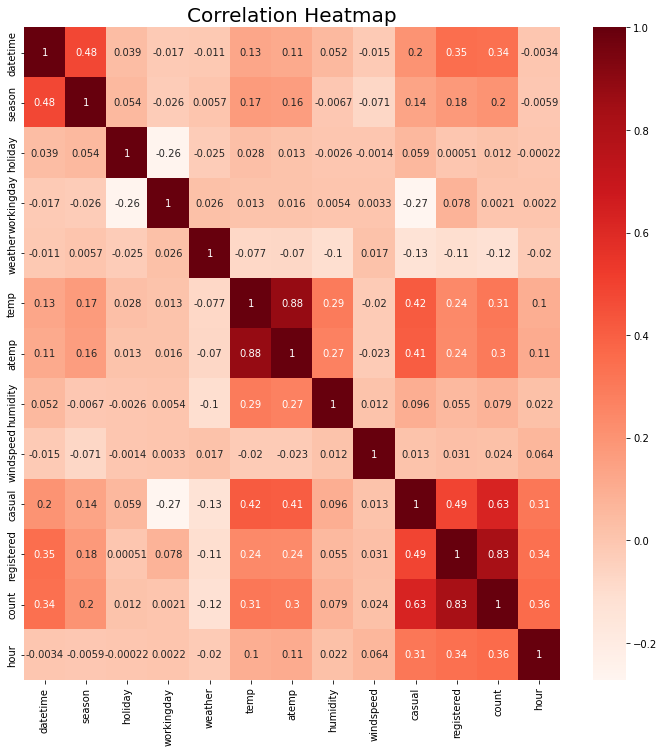

In [31]:
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as s

correlation = trainingSet.apply(lambda x: x.factorize()[0]).corr()
plt.figure(figsize=(12,12))
s.heatmap(correlation, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [32]:
#Taking all columns as features for higher accuracy, except the target ones to predict count of Bikers
Features=trainingSet[['hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']]
Targets=trainingSet['casual']

In [33]:
#Splitting the dataset into training and test sets
TrainFeatures,TestFeatures,TrainTargets,TestTargets=train_test_split(Features,Targets,test_size = 0.25, random_state = 42)
print("Training Features Shape",TrainFeatures.shape)
print("Training Targets Shape",TrainTargets.shape)
print("Testing Features Shape",TestFeatures.shape)
print("Testing Targets Shape",TestTargets.shape)

Training Features Shape (6880, 9)
Training Targets Shape (6880,)
Testing Features Shape (2294, 9)
Testing Targets Shape (2294,)


In [34]:
#Building and Training the Random Forest Regression Model
rf=RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(TrainFeatures,TrainTargets)
#Predicting on the Test Set and calcualting root mean squared error
forestPredictedValues=rf.predict(TestFeatures)
forestPredictedValues

array([  6.797,  40.072, 203.77 , ..., 118.742,  30.137,  37.896])

In [35]:
#Calcualte the root mean square error (RMSE) which is a metric that tells us how far apart our predicted values are from our observed values in a model, on average
RMSE=math.sqrt(np.square(np.subtract(forestPredictedValues,TestTargets)).mean())
print(RMSE)

19.11069071953916


In [36]:
#Building and Training the Decision Tree Regression Model
dt=DecisionTreeRegressor(max_depth=10)
dt.fit(TrainFeatures,TrainTargets)
#Predicting on the Test Set and calcualting root mean squared error
decisionPredictedValues=dt.predict(TestFeatures)
decisionPredictedValues

array([  3.        ,  38.875     , 167.93975904, ...,  93.        ,
        22.81818182,  35.        ])

In [37]:
#Root Mean Squared Error for Decision Tree Regression Model
RMSE=math.sqrt(np.square(np.subtract(decisionPredictedValues,TestTargets)).mean())
print(RMSE)

23.157567333143067


In [38]:
#Building and Training the Linear Regression Model
lr=LinearRegression()
lr.fit(TrainFeatures,TrainTargets)
#Predicting on the Test Set and calcualting root mean squared error
linearPredictedValues=lr.predict(TestFeatures)
linearPredictedValues

array([ 30.90182006,  42.29610893, 104.36717117, ...,  71.31048052,
        16.14771665,  76.9666917 ])

In [39]:
#Root Mean Squared Error for Linear Regression Model
RMSE=math.sqrt(np.square(np.subtract(linearPredictedValues,TestTargets)).mean())
print(RMSE)

35.91938778272201


In [40]:
#Building and Training the K Neighbors Regression Model
kn=KNeighborsRegressor(n_neighbors=5)
kn.fit(TrainFeatures,TrainTargets)
#Predicting on the Test Set and calcualting root mean squared error
kneighbourPredictedValues=kn.predict(TestFeatures)
kneighbourPredictedValues

array([  7.4,  43. , 110. , ...,  59.6,  30.6,  31.8])

In [41]:
#Root Mean Squared Error for K Neighbors Regression Model
RMSE=math.sqrt(np.square(np.subtract(kneighbourPredictedValues,TestTargets)).mean())
print(RMSE)

34.476138596420824


In [42]:
#we can see that RMS error for Random Forest,Decision Tree Regression Models is less,when compared to other models. So this models will be used for better prediction results.
#we will use Random Forest Regression Model to predict the count of Casual Users
#we will predict for actual Testing set,i.e for 17-19th of each month
rf.fit(trainingSet[['hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']],trainingSet['casual'])
PredictedValues=rf.predict(testSet[['hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']])
testSet['casual']=np.round(PredictedValues,2)

In [43]:
#we will use Decision Tree Regression Model to predict the count of Registered Users
dt.fit(trainingSet[['hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']],trainingSet['registered'])
PredictedValues=dt.predict(testSet[['hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']])
testSet['registered']=np.round(PredictedValues,2)

In [44]:
#Adding both the counts of casual and registered users to get totals
testSet['count']=testSet['casual']+testSet['registered']
testSet[['datetime','count']].to_csv('my_prediction.csv',header=True,sep=',',index=False,encoding='utf-8')
print(str("!!!TESTING SET!!!").center(100))
print(testSet.head(5).to_string())

                                         !!!TESTING SET!!!                                          
              datetime  season  holiday  workingday  weather  temp  atemp  humidity  windspeed  hour  casual  registered  count
0  2011-01-17 00:00:00       1        1           0        2  8.20  9.850        47    15.0013     0    2.81       44.00  46.81
1  2011-01-17 01:00:00       1        1           0        2  8.20  9.850        44    12.9980     1    2.64       44.00  46.64
2  2011-01-17 02:00:00       1        1           0        2  7.38  8.335        43    16.9979     2    3.74       19.57  23.31
3  2011-01-17 03:00:00       1        1           0        2  7.38  9.090        43    12.9980     3    1.40       11.40  12.80
4  2011-01-17 04:00:00       1        1           0        2  7.38  9.850        43     8.9981     4    1.52        4.90   6.42
